# NYC Street Trees

* **Data:** `street-trees.csv`
* **Description:** Every five years New York City counts all of the trees that are planted on the streets of the city (not in parks).
* **Source:** https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh
* **Columns of interest:**
    * `tree_dbh` width of the tree's trunk, in inches. If it's `0`, it was not measured.
    * `stump_diam` width of the tree's stump, in inches (if the tree has been cut down). If it's `0`, it was not measured.
    * `curb` how close to the curb it is
    * `status` whether it is alive or not
    * `health` how healthy it is 
    * `spc_latin` the Latin/scientific name for the tree
    * `guards` whether guards are installed to protect it from trees/dogs/etc
    * `sidewalk` whether the roots have damaged the surrounding sidewalk
    * `zipcode` Five-digit zipcode in which tree is located
    * `borough` Name of borough in which tree is located
    * `nta_name` Name of neighborhood in which tree is located

## Read in your data

In [12]:
import pandas as pd

pd.set_option("display.max_columns", None)
df = pd.read_csv("street-trees.csv")
df.head()

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3.0,NaN,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.768749
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21.0,NaN,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.837379
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.253136
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21.0,NaN,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.425999


## What is the percentage of alive vs dead trees?

In [13]:
df.status.value_counts(normalize=True, dropna=False) * 100

Alive    95.376491
Stump     2.581794
Dead      2.041715
Name: status, dtype: float64

## Filter your dataframe to only been trees that are still alive

In [14]:
df[df.status=="Alive"]

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3.0,NaN,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.768749
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21.0,NaN,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.837379
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.253136
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21.0,NaN,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.425999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,08/18/2015,155433,217978,POINT (-73.95494401022562 40.7132107823145),25.0,NaN,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.636255
683784,08/29/2015,183795,348185,POINT (-73.85665019989099 40.71519444267162),7.0,NaN,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.647547
683785,08/22/2015,166161,401670,POINT (-74.13651724205825 40.62076152739799),12.0,NaN,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.076270
683786,08/29/2015,184028,504204,POINT (-73.90311472453581 40.850828186655754),9.0,NaN,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.950653


## Where are these trees? Make a horizontal bar plot of the top five neighborhoods trees are located in, with the longest bar at the top.

<AxesSubplot:>

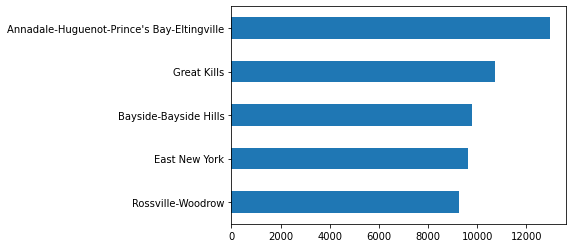

In [15]:
df.nta_name.value_counts().head(5).sort_values().plot(kind="barh")

## For trees in Queens, what are the top 3 kinds of trees?

In [16]:
df[df.boroname=="Queens"].spc_common.value_counts().head(3)

London planetree    31111
pin oak             22610
honeylocust         20290
Name: spc_common, dtype: int64

## What borough has the most trees in our dataset?

In [17]:
df.boroname.value_counts().head(1)

Queens    250551
Name: boroname, dtype: int64

## Save a CSV file of just trees in East Williamsburg, calling it `east-williamsburg.csv`

In [18]:
df_east= df[df.nta_name=="East Williamsburg"]
df_east.to_csv("output.csv", index=False)
df_east

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.253136
247,09/05/2015,204224,217797,POINT (-73.93895705650718 40.71308988154833),13.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,296 POWERS STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3048100,New York,40.713090,-73.938957,1.001173e+06,199080.272493
273,09/05/2015,204025,218365,POINT (-73.93663138986484 40.71763375446986),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717634,-73.936631,1.001816e+06,200736.201268
392,08/19/2015,159658,216819,POINT (-73.94425848829616 40.70378287332874),8.0,NaN,OnCurb,Alive,Good,Magnolia grandiflora,southern magnolia,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,50 MANHATTAN AVENUE,11206,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3049100,New York,40.703783,-73.944258,9.997052e+05,195688.469893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683457,09/05/2015,204594,217950,POINT (-73.93792464138212 40.71378355661484),17.0,NaN,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,316 DEVOE STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3048100,New York,40.713784,-73.937925,1.001459e+06,199333.200465
683476,09/05/2015,203928,218162,POINT (-73.94120372879853 40.714777593020095),21.0,NaN,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,None,None,Damage,Volunteer,"Stones,RootOther,BranchLights",Yes,No,Yes,No,No,No,Yes,No,No,3 ORIENT AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3047700,New York,40.714778,-73.941204,1.000549e+06,199694.730910
683530,08/25/2015,174297,217297,POINT (-73.9450016370113 40.70826339560502),5.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,158 MANHATTAN AVENUE,11206,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3050500,New York,40.708263,-73.945002,9.994981e+05,197320.728112
683605,09/05/2015,204335,217969,POINT (-73.93422151547658 40.71360066150258),9.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,NoDamage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713601,-73.934222,1.002485e+06,199267.315426


## How many trees are elm trees?

Count both `American elm` and `Chinese elm`.

In [27]:
elms = ['American elm', 'Chinese elm']
df[df['spc_common'].isin(elms)]

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
72,09/08/2015,209441,503960,POINT (-73.91763219387903 40.846375825268666),5.0,NaN,OnCurb,Alive,Poor,Ulmus americana,American elm,None,None,NoDamage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,75 FEATHERBED LANE,10453,Bronx,205,2,Bronx,14,77,29,BX36,University Heights-Morris Heights,2021502,New York,40.846376,-73.917632,1.007039e+06,247645.677987
77,09/08/2015,209909,504038,POINT (-73.90688618113626 40.848106229042735),2.0,NaN,OnCurb,Alive,Good,Ulmus americana,American elm,None,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,1840 GRAND CONCOURSE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023302,New York,40.848106,-73.906886,1.010011e+06,248279.107166
78,08/27/2015,180295,106100,POINT (-73.9829175035826 40.77013008975271),2.0,NaN,OnCurb,Alive,Good,Ulmus americana,American elm,1or2,None,NoDamage,Volunteer,"WiresRope,BranchOther",No,No,No,Yes,No,No,No,No,Yes,13 WEST 61 STREET,10023,New York,107,1,Manhattan,3,67,27,MN14,Lincoln Square,1014500,New York,40.770130,-73.982917,9.889817e+05,219856.398920
98,09/07/2015,208247,106402,POINT (-73.97308772691781 40.78250569576515),29.0,NaN,OnCurb,Alive,Fair,Ulmus americana,American elm,1or2,Helpful,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,15 WEST 81 STREET,10024,New York,107,1,Manhattan,6,67,29,MN12,Upper West Side,1016500,New York,40.782506,-73.973088,9.917030e+05,224365.931895
120,09/02/2015,196440,108889,POINT (-73.96412322243684 40.81114537770991),5.0,NaN,OnCurb,Alive,Fair,Ulmus americana,American elm,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,475 RIVERSIDE DRIVE,10115,New York,109,1,Manhattan,7,69,31,MN09,Morningside Heights,1020500,New York,40.811145,-73.964123,9.941814e+05,234801.253216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683441,08/29/2015,185824,505273,POINT (-73.89209877010845 40.85009007642288),10.0,NaN,OnCurb,Alive,Fair,Ulmus americana,American elm,None,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,2100 LA FONTAINE AVENUE,10457,Bronx,206,2,Bronx,15,86,33,BX17,East Tremont,2037504,New York,40.850090,-73.892099,1.014102e+06,249006.591603
683450,08/31/2015,192475,104604,POINT (-73.99242349700346 40.75165328234461),9.0,NaN,OnCurb,Alive,Good,Ulmus americana,American elm,1or2,Helpful,Damage,Volunteer,TrunkOther,No,No,No,No,No,Yes,No,No,No,247 WEST 34 STREET,10001,New York,105,1,Manhattan,3,75,31,MN17,Midtown-Midtown South,1010100,New York,40.751653,-73.992424,9.863492e+05,213124.321505
683451,08/31/2015,192477,104604,POINT (-73.99282954783796 40.751824276556896),10.0,NaN,OnCurb,Alive,Good,Ulmus americana,American elm,1or2,Helpful,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,259 WEST 34 STREET,10001,New York,105,1,Manhattan,3,75,31,MN17,Midtown-Midtown South,1010100,New York,40.751824,-73.992830,9.862367e+05,213186.610750
683504,08/31/2015,192478,104604,POINT (-73.99299436771383 40.75189368417311),11.0,NaN,OnCurb,Alive,Good,Ulmus americana,American elm,1or2,Helpful,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,272 WEST 34 STREET,10001,New York,105,1,Manhattan,3,75,31,MN17,Midtown-Midtown South,1010100,New York,40.751894,-73.992994,9.861910e+05,213211.894492


## Create a new column called `width_cm` that is the width of the tree trunk in centimeters

You'll probably get a warning about "A value is trying to be set on a copy of a slice from a DataFrame." That's fine! It just means that this is only applying to alive trees, not the original CSV that includes dead trees and stumps.

In [9]:
df["width_cm"]= df.tree_dbh * 2.54
df.head()

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp,width_cm
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3.0,NaN,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.768749,7.62
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21.0,NaN,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.837379,53.34
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.891267,7.62
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.253136,25.40
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21.0,NaN,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.425999,53.34


## What is the median trunk width, in centimeters?

In [11]:
#df[df.width_cm.isna()]- tried looking for null values.
df.width_cm.median()

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp,width_cm
307,09/07/2015,208525,103974,POINT (-73.98974807814508 40.764580563550844),NaN,9.0,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,424 WEST 51 STREET,10019,New York,104,1,Manhattan,3,75,27,MN15,Clinton,1013300,New York,40.764581,-73.989748,9.870899e+05,217834.227439,NaN
494,08/26/2015,176343,230511,POINT (-73.95830423336267 40.637879214299566),NaN,17.0,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,2010 NEWKIRK AVENUE,11226,Brooklyn,314,3,Brooklyn,40,42,21,BK42,Flatbush,3051601,New York,40.637879,-73.958304,9.958222e+05,171675.729205,NaN
598,09/19/2015,239221,225750,POINT (-73.97718356345842 40.655987310935444),NaN,16.0,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,1679 11 AVENUE,11218,Brooklyn,307,3,Brooklyn,39,44,21,BK40,Windsor Terrace,3017100,New York,40.655987,-73.977184,9.905807e+05,178271.075594,NaN
619,09/07/2015,208246,106402,POINT (-73.97303810215779 40.78245490847852),NaN,6.0,OffsetFromCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,15 WEST 81 STREET,10024,New York,107,1,Manhattan,6,67,29,MN12,Upper West Side,1016500,New York,40.782455,-73.973038,9.917168e+05,224347.432588,NaN
640,08/27/2015,179766,230466,POINT (-73.95381354446748 40.637378972809216),NaN,30.0,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,2676 BEDFORD AVENUE,11210,Brooklyn,314,3,Brooklyn,45,42,21,BK42,Flatbush,3077000,New York,40.637379,-73.953814,9.970686e+05,171494.102928,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683343,08/17/2015,152836,217718,POINT (-73.95641829339677 40.71124560152207),NaN,13.0,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,281 SOUTH 2 STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3052300,New York,40.711246,-73.956418,9.963323e+05,198405.454617,NaN
683684,08/31/2015,191219,321689,POINT (-73.76568814203866 40.761032001042416),NaN,25.0,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,NYC Parks Staff,NaN,No,No,No,No,No,No,No,No,No,43-035 216 STREET,11361,Bayside,411,4,Queens,19,26,11,QN46,Bayside-Bayside Hills,4147100,New York,40.761032,-73.765688,1.049161e+06,216628.017253,NaN
683693,08/24/2015,170888,231931,POINT (-73.95561877067514 40.64715392590767),NaN,5.0,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,2327 BEDFORD AVENUE,11226,Brooklyn,317,3,Brooklyn,40,42,21,BK95,Erasmus,3079400,New York,40.647154,-73.955619,9.965658e+05,175055.125005,NaN
683695,08/26/2015,177922,410634,POINT (-74.16524648816744 40.528543916675346),NaN,17.0,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,419 HOLDRIDGE AVENUE,10312,Staten Island,503,5,Staten Island,51,62,24,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5017600,New York,40.528544,-74.165246,9.383125e+05,131882.712006,NaN


## What are the four narrowest trees in our dataset?

In [83]:
df.sort_values("width_cm").head(4)

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp,width_cm
386236,06/11/2016,582658,314907,POINT (-73.80227229380444 40.78470204276982),1.0,NaN,OnCurb,Alive,Good,Ginkgo biloba,ginkgo,1or2,Unsure,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,160-001 16 AVENUE,11357,Whitestone,407,4,Queens,19,26,11,QN47,Ft. Totten-Bay Terrace-Clearview,4101700,New York,40.784702,-73.802272,1.039006e+06,225226.790082,2.54
242932,11/14/2015,456617,409483,POINT (-74.090381633272 40.57202827515189),1.0,NaN,OnCurb,Alive,Good,Ginkgo biloba,ginkgo,None,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,806 PATTERSON AVENUE,10306,Staten Island,502,5,Staten Island,50,64,24,SI45,New Dorp-Midland Beach,5011202,New York,40.572028,-74.090382,9.591408e+05,147694.731563,2.54
13799,05/22/2015,1904,406646,POINT (-74.15454349511522 40.5844267850501),1.0,NaN,OnCurb,Alive,Fair,Betula pendula,silver birch,None,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,4 TURF COURT,10314,Staten Island,502,5,Staten Island,50,63,24,SI24,Todt Hill-Emerson Hill-Heartland Village-Light...,5027704,New York,40.584427,-74.154544,9.413238e+05,152236.729697,2.54
62192,09/28/2015,265939,332532,POINT (-73.73149350892929 40.68256946864127),1.0,NaN,OnCurb,Alive,Fair,Cornus kousa,kousa dogwood,None,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,234-010 128 AVENUE,11422,Rosedale,413,4,Queens,31,29,14,QN66,Laurelton,4061601,New York,40.682569,-73.731494,1.058721e+06,188069.020893,2.54


## What is the median trunk width, in centimeters, of trees that have damaged the sidewalk vs those who have not damaged the sidewalk?

In [87]:
df.groupby("sidewalk").width_cm.median()

sidewalk
Damage      33.02
NoDamage    20.32
Name: width_cm, dtype: float64